<a href="https://colab.research.google.com/github/neilgarnet/ML-Weather-Project/blob/main/LSTMModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload()
#Displaying basic information about the dataset
df = pd.read_csv("Waether dataset.csv")
print("Dataset Information:")
print(df.info())
print("\nFirst 5 rows of the dataset:")
print(df.head())
print("\nStatistical Summary:")
print(df.describe())



Saving Waether dataset.csv to Waether dataset.csv
Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           150 non-null    object 
 1   city           150 non-null    object 
 2   country        150 non-null    object 
 3   latitude       150 non-null    float64
 4   longitude      150 non-null    float64
 5   temperature    150 non-null    float64
 6   humidity       150 non-null    float64
 7   precipitation  150 non-null    float64
 8   AQI            150 non-null    int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 10.7+ KB
None

First 5 rows of the dataset:
         date      city    country  latitude  longitude  temperature  \
0  2024-06-01  New York        USA   40.7128   -74.0060     5.261208   
1  2024-06-01    London         UK   51.5074    -0.1278    16.828661   
2  2024-06-01     Tokyo    

In [ ]:
# Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())



Missing Values in Each Column:
date             0
city             0
country          0
latitude         0
longitude        0
temperature      0
humidity         0
precipitation    0
AQI              0
dtype: int64


In [ ]:
# Removing duplicate rows if any
df = df.drop_duplicates()
print(df)

           date      city    country  latitude  longitude  temperature  \
0    2024-06-01  New York        USA   40.7128   -74.0060     5.261208   
1    2024-06-01    London         UK   51.5074    -0.1278    16.828661   
2    2024-06-01     Tokyo      Japan   35.6895   139.6917    19.189069   
3    2024-06-01    Sydney  Australia  -33.8688   151.2093    12.814943   
4    2024-06-01    Mumbai      India   19.0760    72.8777     9.848917   
..          ...       ...        ...       ...        ...          ...   
145  2024-06-30  New York        USA   40.7128   -74.0060    13.522181   
146  2024-06-30    London         UK   51.5074    -0.1278    10.526193   
147  2024-06-30     Tokyo      Japan   35.6895   139.6917     1.573264   
148  2024-06-30    Sydney  Australia  -33.8688   151.2093    17.722635   
149  2024-06-30    Mumbai      India   19.0760    72.8777    -0.910156   

     humidity  precipitation  AQI  
0       43.13       0.288007  152  
1       63.49       0.849684  142  
2  

In [ ]:
# Convert 'date' column to datetime format and extract additional temporal features
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
print(df)

          date      city    country  latitude  longitude  temperature  \
0   2024-06-01  New York        USA   40.7128   -74.0060     5.261208   
1   2024-06-01    London         UK   51.5074    -0.1278    16.828661   
2   2024-06-01     Tokyo      Japan   35.6895   139.6917    19.189069   
3   2024-06-01    Sydney  Australia  -33.8688   151.2093    12.814943   
4   2024-06-01    Mumbai      India   19.0760    72.8777     9.848917   
..         ...       ...        ...       ...        ...          ...   
145 2024-06-30  New York        USA   40.7128   -74.0060    13.522181   
146 2024-06-30    London         UK   51.5074    -0.1278    10.526193   
147 2024-06-30     Tokyo      Japan   35.6895   139.6917     1.573264   
148 2024-06-30    Sydney  Australia  -33.8688   151.2093    17.722635   
149 2024-06-30    Mumbai      India   19.0760    72.8777    -0.910156   

     humidity  precipitation  AQI  month  day  
0       43.13       0.288007  152      6    1  
1       63.49       0.84968

In [ ]:
# Creating new features based on domain insights:
# - Interaction between temperature and humidity
# - Interaction between temperature and precipitation
df['temp_humidity_interaction'] = df['temperature'] * df['humidity']
df['temp_precipitation_interaction'] = df['temperature'] * df['precipitation']

In [ ]:
#Outlier Detection & Treatment using IQR
def cap_outliers(col):
    """
    Caps the outliers in a numerical column using the IQR method.
    Outliers below (Q1 - 1.5*IQR) or above (Q3 + 1.5*IQR) are replaced with these threshold values.
    """
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return col.clip(lower_bound, upper_bound)

# Applying outlier capping on 'temperature' and 'precipitation'
df['temperature'] = cap_outliers(df['temperature'])
df['precipitation'] = cap_outliers(df['precipitation'])
print(df)

          date      city    country  latitude  longitude  temperature  \
0   2024-06-01  New York        USA   40.7128   -74.0060     5.261208   
1   2024-06-01    London         UK   51.5074    -0.1278    16.828661   
2   2024-06-01     Tokyo      Japan   35.6895   139.6917    19.189069   
3   2024-06-01    Sydney  Australia  -33.8688   151.2093    12.814943   
4   2024-06-01    Mumbai      India   19.0760    72.8777     9.848917   
..         ...       ...        ...       ...        ...          ...   
145 2024-06-30  New York        USA   40.7128   -74.0060    13.522181   
146 2024-06-30    London         UK   51.5074    -0.1278    10.526193   
147 2024-06-30     Tokyo      Japan   35.6895   139.6917     1.573264   
148 2024-06-30    Sydney  Australia  -33.8688   151.2093    17.722635   
149 2024-06-30    Mumbai      India   19.0760    72.8777    -0.910156   

     humidity  precipitation  AQI  month  day  temp_humidity_interaction  \
0       43.13       0.288007  152      6    1  

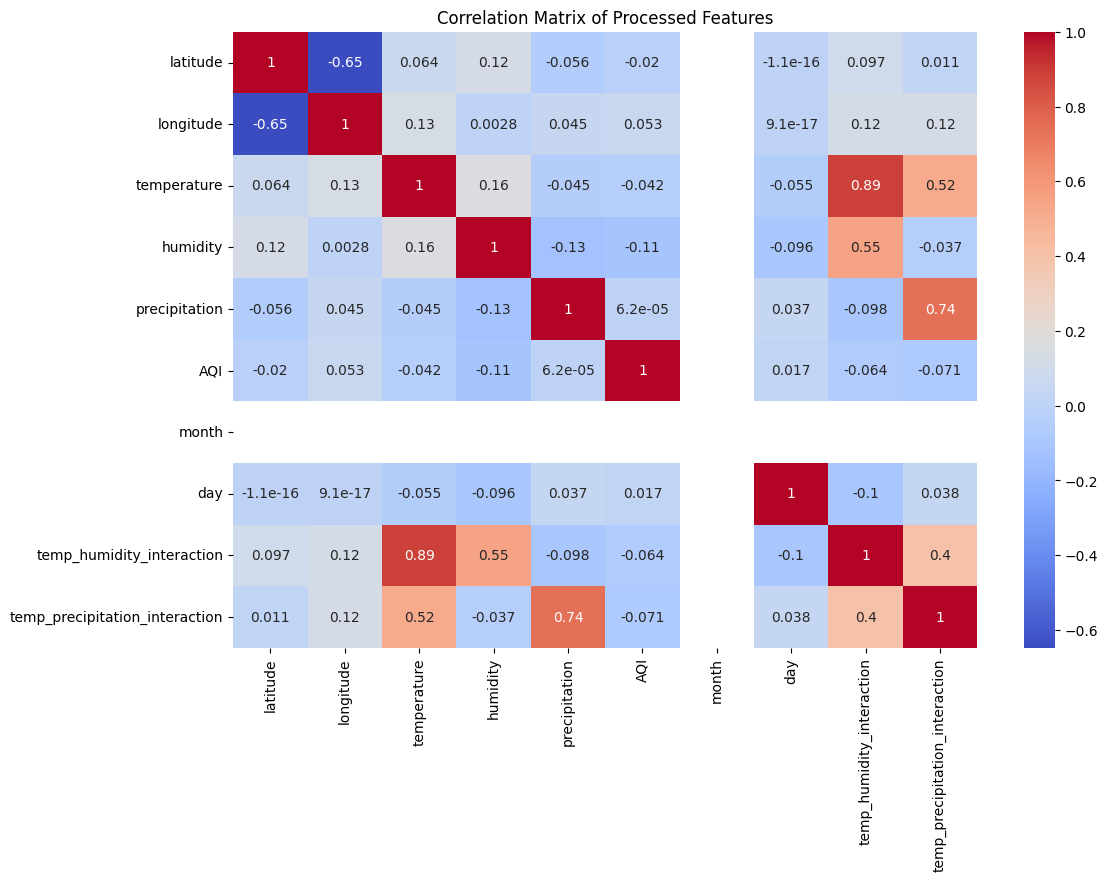

In [ ]:
# Feature Selection Insight (Correlation Matrix)
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])
# Plot the correlation matrix to understand relationships between features
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Processed Features")
plt.show()



In [ ]:
# Final Processed Data Overview
print(df)

          date      city    country  latitude  longitude  temperature  \
0   2024-06-01  New York        USA   40.7128   -74.0060     5.261208   
1   2024-06-01    London         UK   51.5074    -0.1278    16.828661   
2   2024-06-01     Tokyo      Japan   35.6895   139.6917    19.189069   
3   2024-06-01    Sydney  Australia  -33.8688   151.2093    12.814943   
4   2024-06-01    Mumbai      India   19.0760    72.8777     9.848917   
..         ...       ...        ...       ...        ...          ...   
145 2024-06-30  New York        USA   40.7128   -74.0060    13.522181   
146 2024-06-30    London         UK   51.5074    -0.1278    10.526193   
147 2024-06-30     Tokyo      Japan   35.6895   139.6917     1.573264   
148 2024-06-30    Sydney  Australia  -33.8688   151.2093    17.722635   
149 2024-06-30    Mumbai      India   19.0760    72.8777    -0.910156   

     humidity  precipitation  AQI  month  day  temp_humidity_interaction  \
0       43.13       0.288007  152      6    1  

In [ ]:
!pip install tensorflow


In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
# 1. Data Preparation

# For LSTM, we need a single target variable. Let's predict 'temperature'
target = 'temperature'

# Select only the features you want (ensure they are numeric)
# Here we drop non-numeric columns (like 'date', 'city', 'country')
features = df.drop(columns=['date', 'city', 'country', target])
target_values = df[target].values

# Scale the features and target between 0 and 1
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(features)
y_scaled = scaler_y.fit_transform(target_values.reshape(-1, 1))

In [ ]:
# 2. Creating Time Series Data (Sliding Window)

def create_sequences(X, y, window_size=5):
    X_seq, y_seq = [], []
    for i in range(len(X) - window_size):
        X_seq.append(X[i:i+window_size])
        y_seq.append(y[i+window_size])
    return np.array(X_seq), np.array(y_seq)

# Choose a window size (number of timesteps)
window_size = 5
X_seq, y_seq = create_sequences(X_scaled, y_scaled, window_size)

In [ ]:
# 3. Split Data into Training and Testing Sets

X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

In [ ]:
# 4. Define and Train the LSTM Model

model = Sequential()
# LSTM layer with 50 units, input_shape: (window_size, number of features)
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
# Final dense layer to output a single value
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 5, 50)               │          12,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 5, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,251 (125.98 KB)

 Trainable params: 32,251 (125.98 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 162ms/step - loss: 0.2865 - val_loss: 0.1524
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0945 - val_loss: 0.0366
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0508 - val_loss: 0.0399
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0433 - val_loss: 0.0342
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0385 - val_loss: 0.0426
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0463 - val_loss: 0.0397
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0325 - val_loss: 0.0358
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0364 - val_loss: 0.0339
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0291 - val_loss: 0.0332
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0418 - val_loss: 0.0348
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0335 - val_loss: 0.0347
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0355 - val_loss: 0.0348


In [ ]:
# 5. Evaluate the Model

# Predict on test set
y_pred = model.predict(X_test)

# Inverse scale predictions and true values for interpretation
y_test_inv = scaler_y.inverse_transform(y_test)
y_pred_inv = scaler_y.inverse_transform(y_pred)

# Calculate evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mae = mean_absolute_error(y_test_inv, y_pred_inv)
r2 = r2_score(y_test_inv, y_pred_inv)

print(f"Test RMSE: {rmse:.2f}")
print(f"Test MAE: {mae:.2f}")
print(f"Test R² Score: {r2:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step
Test RMSE: 8.03
Test MAE: 6.14
Test R² Score: -0.15


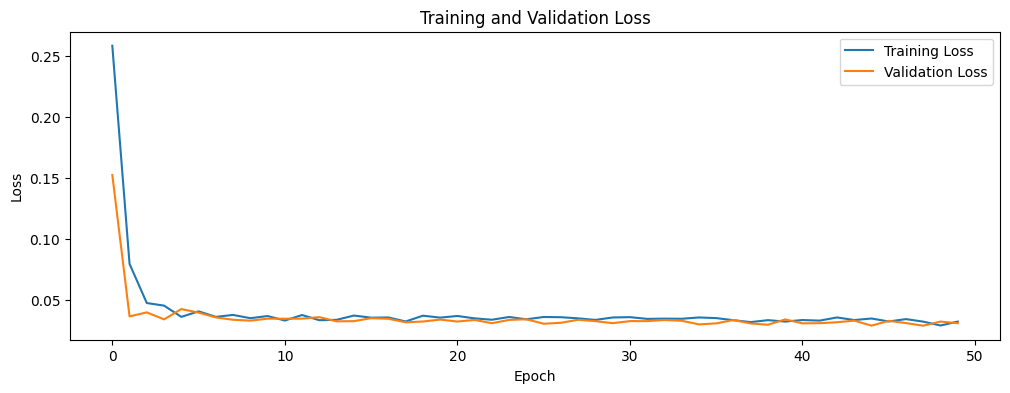

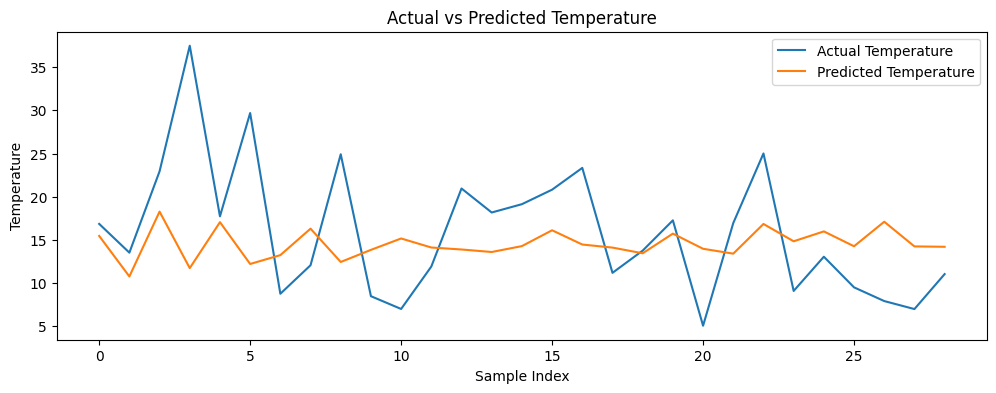

In [ ]:
# 6. Plot Training History and Predictions

plt.figure(figsize=(12, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(12,4))
plt.plot(y_test_inv, label='Actual Temperature')
plt.plot(y_pred_inv, label='Predicted Temperature')
plt.title("Actual vs Predicted Temperature")
plt.xlabel("Sample Index")
plt.ylabel("Temperature")
plt.legend()
plt.show()